In [21]:
# !pip3 install numpy matplotlib autograd > None

In [22]:
# !pip install --upgrade --force-reinstall numpy --user > None

# Regression

**Goal**: teach computer to predict a numerical value given some input

**Model**. Consider approach based on regression analyis.
[Regression analysis](https://en.wikipedia.org/wiki/Regression_analysis) is a statistical technique to estimate dependence between variables.
Suppose we have samples $x_n$ of a random value $X$ and the corresponding samples $y_n$ of a random value $Y$.
We assume $Y$ is a function $f$ of $X$ plus an error term independent of $X$:

$$
Y=f(X;\theta)+W.
$$

The function $f$ defines possible relationship between the variables and the parameters $\theta$ controls exact form of the dependence.


**Example 1.** Implement in Python function to sample the function $y=\sin x$ with addition of normally distributed noise.

In [23]:
# import numpy as np
import autograd as ag
import autograd.numpy as np
import matplotlib.pyplot as plt

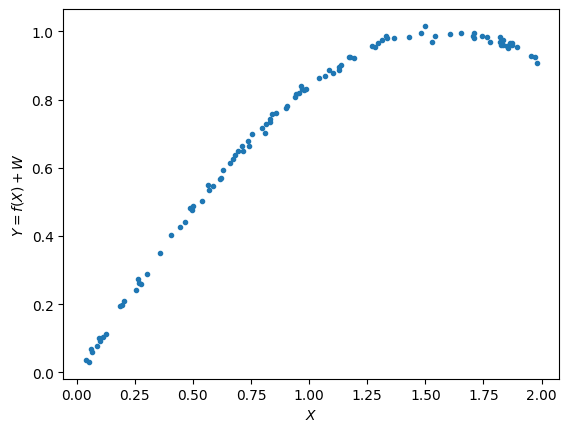

In [24]:
S = 100 # sample size
X = np.random.rand(S)*2 # initialise X array
# print(f'min X = {np.min(X)}, max X = {np.max(X)}')

W = np.random.randn(S)*0.01 # initialize noise
Y = np.sin(X) + W # create Y samples as sin function with noise
plt.plot(X,Y, '.') # ploting samples
plt.xlabel('$X$')
plt.ylabel('$Y=f(X)+W$')
plt.show()

**Approaches**. In fact as far as we need to find best function that approximate input, we will solve an optimization problem. Thus we need to define something to optimize. Mainly two functions are used: **loss** and **likelihood** functions.

**Minimum loss function principle**.
Function $f$ is a solution controlled by the parameter $\theta$. The optimal $\theta$ provides the best fitting function. To find optimal value we need to solve optimization problem or find minimum of some error function. Define **Loss function**:

$$
R[x,y] = ||y - f(x,\theta)||^2
$$

The solution of optimisation problem is $\theta_{opt} = \mathrm{argmin}_\theta(L)$

In practice, the estimate of $\theta$ is obtained by the [least squares method](https://en.wikipedia.org/wiki/Least_squares)
from minimization of the mean square error:

$$
R[\theta] = \sum_n (y_n-f(x_n,\theta))^2.
$$

The minimum of $R$ can be found from the necessary condition of optimality, which is sufficient in the case of quadratic functional:

$$
\frac{\partial R}{\partial\theta_k} = 2\sum_n(y_n-f(x_n,\theta_k))\frac{\partial f}{\partial \theta_k}(x_n,\theta) = 0\quad\forall k.
$$

**Example 2.** Implement a function that solve linear least squares method for decomposition of $y$ over polynomials of degree $D$
on the interval $[0,1]$
using Moore-Penrose inverse:

$$
f(x,\theta)=\sum_{k=0}^D \theta_k x^k.
$$


In [25]:
def f(x, theta):
  xn = np.power(x, np.arange(len(theta)))
  return np.dot(xn, theta)

# theta =        1, x, x^2,   x^3, x^4,       x^5
theta_optimal = np.array([0, 1,   0,-1/2/3,   0, 1/2/3/4/5])

x0 = 0.1
print(x0, f(x0,theta_optimal), np.sin(x0))

0.1 0.09983341666666667 0.09983341664682815


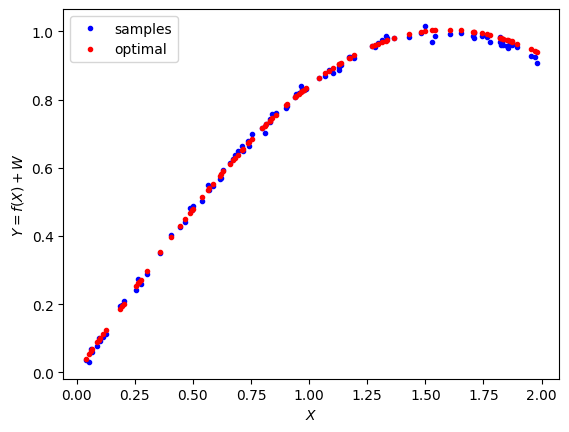

In [26]:
def F(x, D): # basis
  """
  Arguments:
    D - number of parameters.
  """
  return np.power(x[:,None], np.arange(D)[None,:])

def f(x, theta):
  # axis 0 = # sample
  # axis 1 = monomial degree
  xn = F(x, D=len(theta))
  return np.dot(xn, theta)

y_optimal = f(X, theta_optimal)

plt.plot(X,Y, '.b', label='samples')
plt.plot(X,y_optimal, '.r', label='optimal')
plt.xlabel('$X$')
plt.ylabel('$Y=f(X)+W$')
plt.legend()
plt.show()

**Example 3**. Calculate mean square error for obtained solution.

In [27]:
def R(theta, x, y):
  rn = (y - f(x, theta))**2
  return np.sum(rn)

print('Mean square error', R(theta=theta_optimal, x=X, y=Y)/np.sqrt(S) )

Mean square error 0.0012709122191207705


**Maximum likelihood principle**. Another way to approach machine learning problem is a search of maximum of some likelihood function. Likelihood function function is a probability of specific outcome.
Given probability density $f_W$ for random noise $W$, we can estimate likelihood of outcomes resulting in samples $(x_n,y_n)$.
[Likelihood function](https://en.wikipedia.org/wiki/Likelihood_function) for the continuous destribution can be written as follows:
$$
L(\theta|x,y) = \prod_n f_W(y_n-f(x_n,\theta)).
$$

$$
\log L(\theta|x,y) = \sum_n \log f_W(y_n-f(x_n,\theta)).
$$

Maximum of the likelihood function corresponds to the value of $\theta$ such that outcomes $(x_n,y_n)$ are most probable,
thus we obtain the maximum likelihood estimate for the parameters

$$
\hat\theta = \mathrm{argmax}_\theta \log L(\theta|x,y).
$$

**Problem 1.** Which distribution of $W$ does correspond to least squares method (minimum of mean square error coincides with maximum of likelihood function)?


$$R[\theta] = \sum_n (y_n-f(x_n,\theta))^2=\sum_n\log f_W(y_n-f(x_n,\theta))\implies f_W=\exp(C(y_n-f(x_n,\theta))^2)$$

In case of $C=-1/2\sigma^2$, the distribution of $W$ corresponds to Normal Distribution.

---

**Training**.
From the point of view of machine learning (ML), the function $R$ is a loss function measuring performance of the artificial neural network (ANN) $f$ with parameters $\theta$.
The network is used to predict the value of $Y$ given a value of $X$.  
In the context of ML the optimization of $\theta$ above is called training of the algorithm/network.

The simplest method to train an algorithm is the [steepest gradient method](https://en.wikipedia.org/wiki/Gradient_descent).
Given an initial vector of parameters $\theta$, the parameters are updated on each step of optimization by the formula:

$$
\theta\mapsto \theta-\alpha\frac{\partial R}{\partial\theta}[\theta],
$$
until the method converges, i.e. the stop conditions are satisfied, e.g. the loss $R$ is small enough,
or its update $\partial R/\partial \theta$ is small.
The parameter $\alpha$ is learning rate in ML or step size in the numerical methods, it is a metaparameter, i.e. it does not belong to the model, but may affect the result of optimization.
In the simplest form of the gradient descend the learning rate is constant, however often sofisticated method of variation of $\alpha$ are required
to stabilze the method or improve convergence, e.g. [Adam method](https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Adam).
Higher order method, such as [LBFGS](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm), can also be used to improve convergence, however the methods are used less often.

The number of samples sometimes much larger than required to estimate the direction of optimization reliably,
in the case the extra points only slow down the computation of the gradient.
Therefore [stochastic gradient descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) is commonly used in ML instead of the gradient method.
In the method only a subset (batch) of the samples is used to compute the gradient of loss,
the batch is regenerated/resampled after few iterations of optimization.


The most well-known variant of the least square method is the linear one/linear regression.
In the case prediction function $f$ depends on $\theta$ linearly:

$$
f(x,\theta)=\sum_k f_k(x)\theta_k,
$$
where $f_k$ is a set of predefined functions forming a basis (for instance, in **Example 2** we used the basis of polynomials).
Then optimality conditions takes form of a linear system with respect to $\theta$:

$$
\frac{\partial R}{\partial\theta_k} = 2\sum_n\bigg(y_n-\sum_j f_j(x_n)\theta_j\bigg)f_k(x_n) = 0\forall k.
$$

$$
F^T y - F^T F \theta = 0,
$$
where $F$ is a matrix with elements $F_{nk}=f_k(x_n)$

$$
F^T F \theta=F^T y.
$$
The solution to the problem is given by the [Moore-Penrose inverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse) of the matrix $F$:

$$
\hat \theta=(F^T F)^{-1}(F^T y).
$$
Numerically the solution can be computed without computation the square of the matrix $F$ using e.g. [QR-decomposition](https://en.wikipedia.org/wiki/Numerical_methods_for_linear_least_squares).

Unfortunatelly, it is hard to solve least square problem explicitly for dependencies $f$ more complex than linear.
Hopefully, ML methods can be applied to arbitrary sufficiently smooth functions $f$.

**Example 4**. Implement function to solve least square problem and compere obtained parameter value with optimal one.

In [28]:
def lsq(x, y, D):
  f = F(x, D)
  theta = np.linalg.solve( f.T@f, f.T@y )
  return theta

D = len(theta_optimal)
theta_lsq = lsq(X, Y, D)
print(f'opt: {theta_optimal}')
print(f'lsq: {theta_lsq}')


opt: [ 0.          1.          0.         -0.16666667  0.          0.00833333]
lsq: [-0.00749076  1.03178034 -0.03428266 -0.16157443  0.00784713  0.00501008]


**Problem 2.** Split the data set $(x_n,y_n)$ to the training set (80%) and testing set (20%) and choose optimal $D$ avoiding overfitting.

In [29]:
print(len(X))
print(len(Y))
x_tr = X[:80]
y_tr = Y[:80]
print(len(x_tr))
x_t = X[80:]
y_t = Y[80:]
print(len(x_t))

100
100
80
20


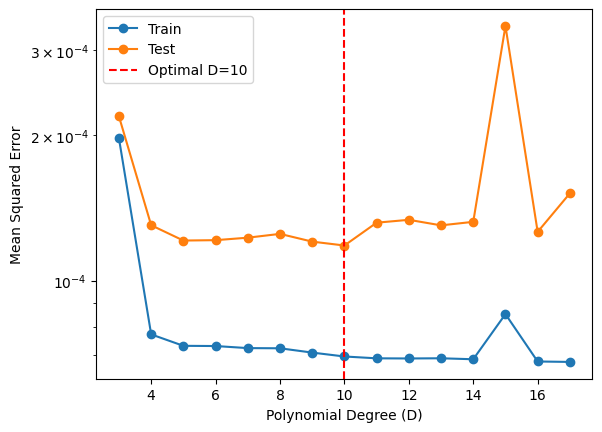

Optimal D: 10 with Test MSE: 0.00012


In [30]:
train_errors = []
test_errors = []
Ds = np.arange(15) + 3

for D in Ds:
    try:
        theta = lsq(x_tr, y_tr, D)
        train_mse = R(theta, x_tr, y_tr) / len(x_tr)
        test_mse = R(theta, x_t, y_t) / len(x_t)
        train_errors.append(train_mse)
        test_errors.append(test_mse)
    except np.linalg.LinAlgError:
        print(f"Error at D={D} (singular)")
        train_errors.append(np.inf)
        test_errors.append(np.inf)

optimal_idx = np.argmin(test_errors)
optimal_D = Ds[optimal_idx]

plt.semilogy(Ds, train_errors, 'o-', label='Train')
plt.semilogy(Ds, test_errors, 'o-', label='Test')
plt.axvline(optimal_D, color='r', linestyle='--', label=f'Optimal D={optimal_D}')
plt.xlabel('Polynomial Degree (D)')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

print(f"Optimal D: {optimal_D} with Test MSE: {test_errors[optimal_idx]:.5f}")

Error at D=12 (singular)


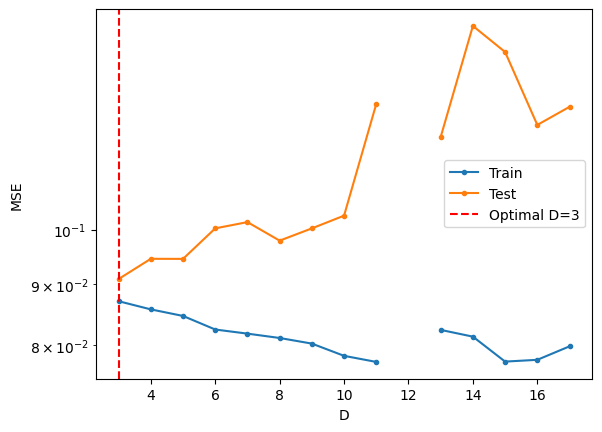

Optimal D: 3 with Test MSE: 0.09087


In [31]:
shuffle_N = 100
train_errors = []
test_errors = []

for D in Ds:
    current_train_errors = []
    current_test_errors = []

    for _ in range(shuffle_N):
        X_s = X.copy()
        Y_s = Y.copy()
        np.random.shuffle(X_s)
        np.random.shuffle(Y_s)

        x_tr, y_tr = X_s[:80], Y_s[:80]
        x_t, y_t = X_s[80:], Y_s[80:]

        try:
            theta = lsq(x_tr, y_tr, D)
            train_mse = R(theta, x_tr, y_tr) / len(x_tr)
            test_mse = R(theta, x_t, y_t) / len(x_t)
            current_train_errors.append(train_mse)
            current_test_errors.append(test_mse)
        except np.linalg.LinAlgError:
            print(f"Error at D={D} (singular)")
            current_train_errors.append(np.inf)
            current_test_errors.append(np.inf)

    train_errors.append(np.mean(current_train_errors))
    test_errors.append(np.mean(current_test_errors))

optimal_idx = np.argmin(test_errors)
optimal_D = Ds[optimal_idx]

plt.semilogy(Ds, train_errors, '.-', label='Train')
plt.semilogy(Ds, test_errors, '.-', label='Test')
plt.axvline(optimal_D, color='r', linestyle='--', label=f'Optimal D={optimal_D}')
plt.xlabel('D')
plt.ylabel('MSE')
plt.legend()
plt.show()

print(f"Optimal D: {optimal_D} with Test MSE: {test_errors[optimal_idx]:.5f}")

In [32]:
shuffle_N = 100
train_errors_mean = []
test_errors_mean = []
current_train_errors_all = [[] for _ in Ds]
current_test_errors_all = [[] for _ in Ds]

for i, D in enumerate(Ds):
    current_train_errors = []
    current_test_errors = []

    for _ in range(shuffle_N):
        X_s = X.copy()
        Y_s = Y.copy()
        np.random.shuffle(X_s)
        np.random.shuffle(Y_s)

        x_tr, y_tr = X_s[:80], Y_s[:80]
        x_t, y_t = X_s[80:], Y_s[80:]

        try:
            theta = lsq(x_tr, y_tr, D)
            train_mse = R(theta, x_tr, y_tr) / len(x_tr)
            test_mse = R(theta, x_t, y_t) / len(x_t)
            current_train_errors.append(train_mse)
            current_test_errors.append(test_mse)
        except np.linalg.LinAlgError:
            continue

    current_train_errors_all[i] = current_train_errors
    current_test_errors_all[i] = current_test_errors
    train_errors_mean.append(np.mean(current_train_errors))
    test_errors_mean.append(np.mean(current_test_errors))

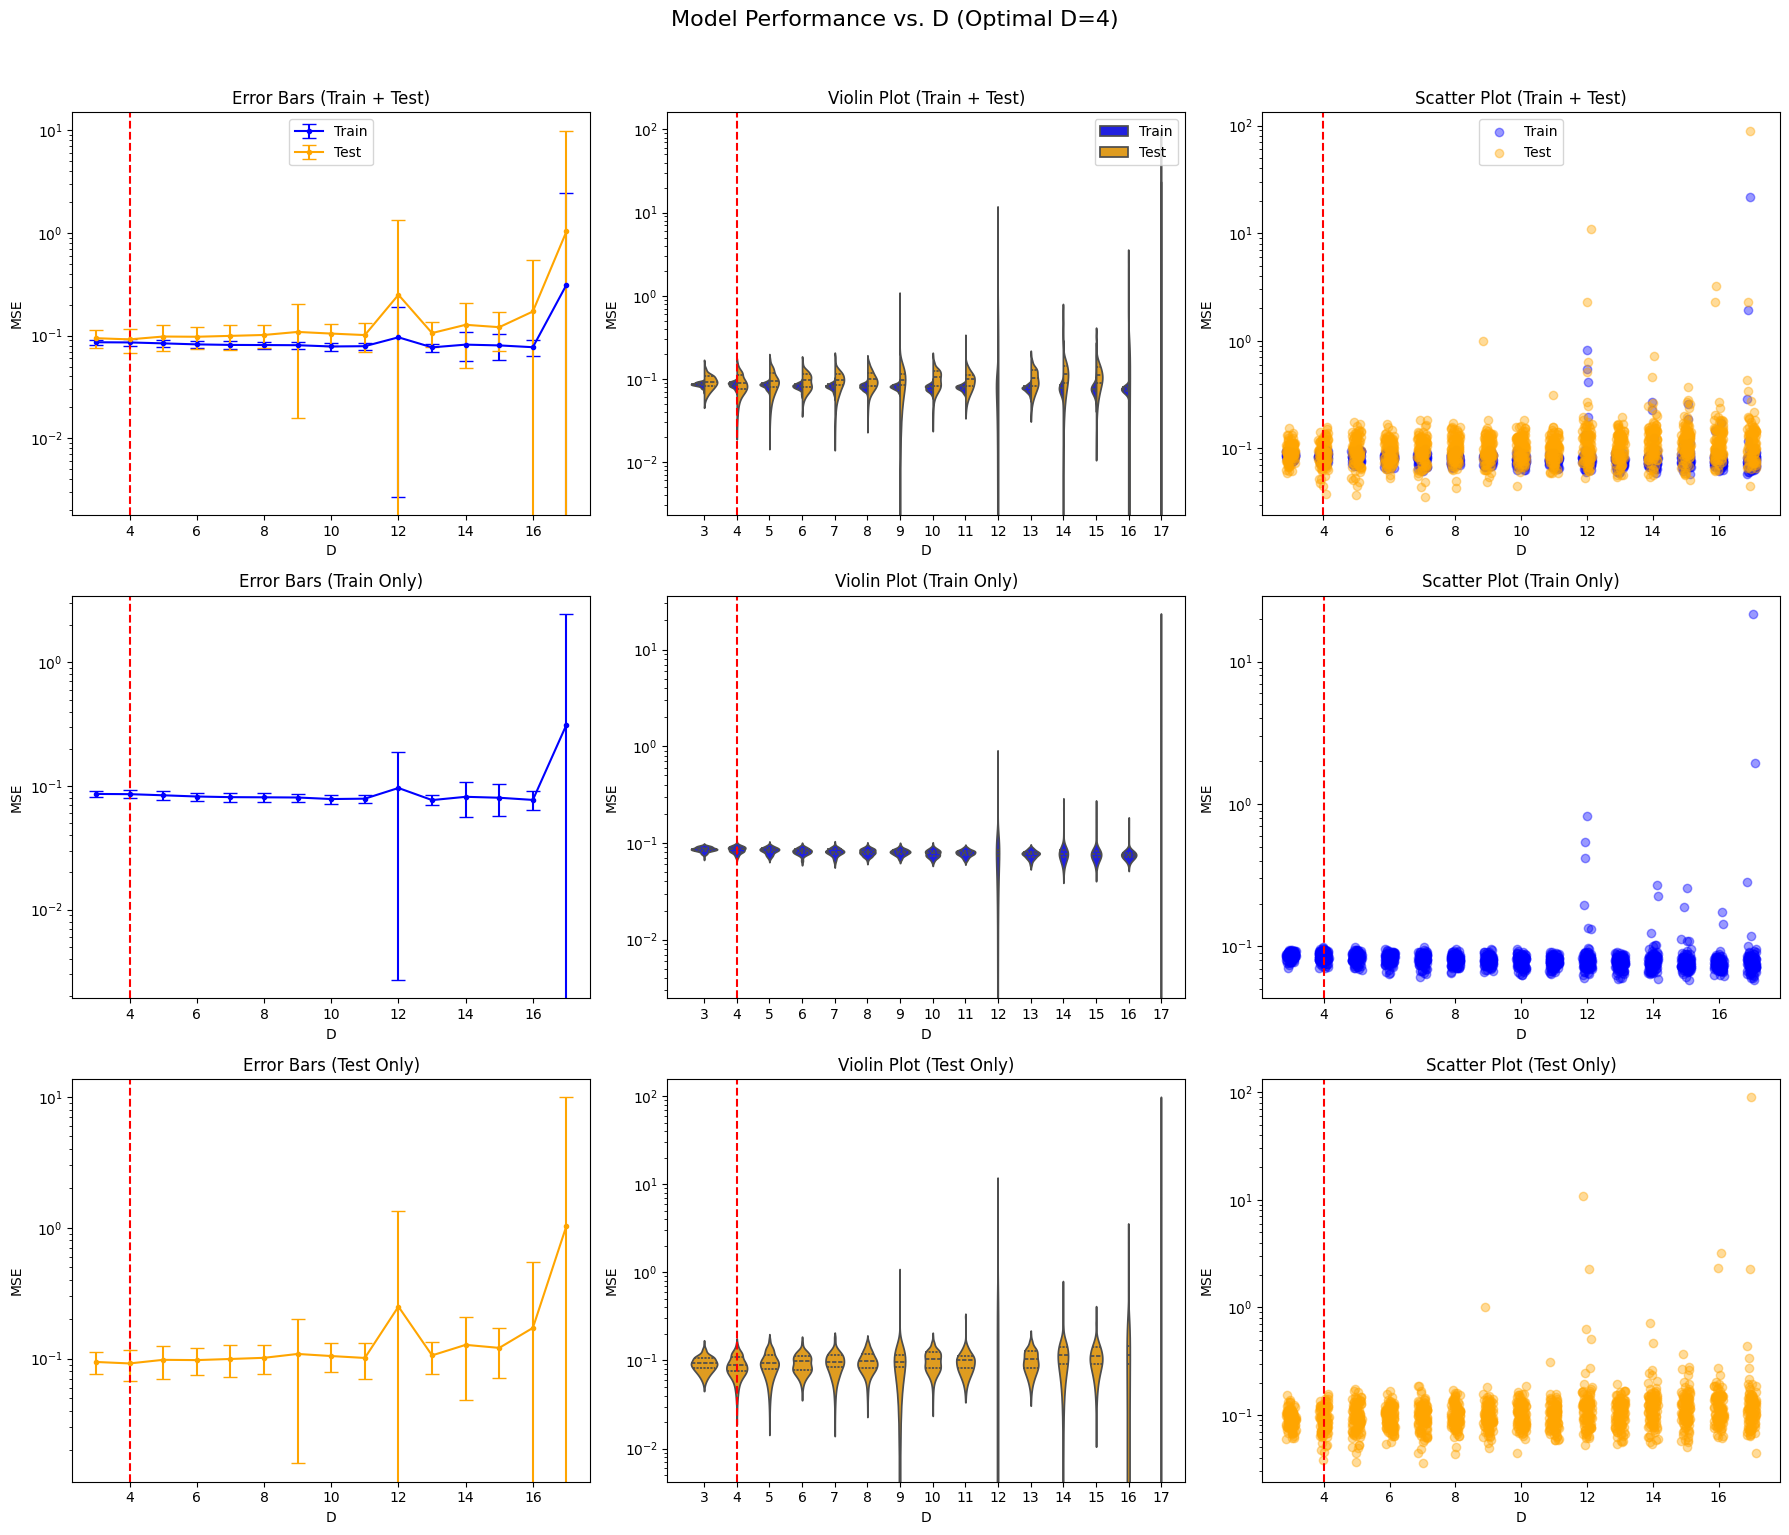

In [36]:
import seaborn as sns
import pandas as pd

optimal_idx = np.argmin(test_errors_mean)
optimal_D = Ds[optimal_idx]

df_train = pd.DataFrame({
    'D': np.repeat(Ds, [len(errors) for errors in current_train_errors_all]),
    'MSE': np.concatenate(current_train_errors_all),
    'Type': 'Train'
})
df_test = pd.DataFrame({
    'D': np.repeat(Ds, [len(errors) for errors in current_test_errors_all]),
    'MSE': np.concatenate(current_test_errors_all),
    'Type': 'Test'
})
df = pd.concat([df_train, df_test])

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
plt.suptitle(f"Model Performance vs. D (Optimal D={optimal_D})", y=1.02, fontsize=16)

axes[0, 0].errorbar(Ds, train_errors_mean, yerr=np.std(current_train_errors_all, axis=1), 
                    fmt='.-', capsize=5, color='blue', label='Train')
axes[0, 0].errorbar(Ds, test_errors_mean, yerr=np.std(current_test_errors_all, axis=1), 
                    fmt='.-', capsize=5, color='orange', label='Test')
axes[0, 0].axvline(optimal_D, color='red', linestyle='--')
axes[0, 0].set_title("Error Bars (Train + Test)")
axes[0, 0].semilogy()
sns.violinplot(data=df, x='D', y='MSE', hue='Type', split=True, inner="quartile", 
               ax=axes[0, 1], palette=['blue', 'orange'])
axes[0, 1].axvline(optimal_idx, color='red', linestyle='--')
axes[0, 1].set_title("Violin Plot (Train + Test)")
axes[0, 1].semilogy()
for i, D in enumerate(Ds):
    jitter = np.random.uniform(-0.15, 0.15, size=len(current_train_errors_all[i]))
    axes[0, 2].scatter(D + jitter, current_train_errors_all[i], alpha=0.4, color='blue', label='Train' if i==0 else "")
    axes[0, 2].scatter(D + jitter, current_test_errors_all[i], alpha=0.4, color='orange', label='Test' if i==0 else "")
axes[0, 2].axvline(optimal_D, color='red', linestyle='--')
axes[0, 2].set_title("Scatter Plot (Train + Test)")
axes[0, 2].semilogy()

axes[1, 0].errorbar(Ds, train_errors_mean, yerr=np.std(current_train_errors_all, axis=1), 
                    fmt='.-', capsize=5, color='blue')
axes[1, 0].axvline(optimal_D, color='red', linestyle='--')
axes[1, 0].set_title("Error Bars (Train Only)")
axes[1, 0].semilogy()
sns.violinplot(data=df_train, x='D', y='MSE', color='blue', inner="quartile", ax=axes[1, 1])
axes[1, 1].axvline(optimal_idx, color='red', linestyle='--')
axes[1, 1].set_title("Violin Plot (Train Only)")
axes[1, 1].semilogy()
for i, D in enumerate(Ds):
    jitter = np.random.uniform(-0.15, 0.15, size=len(current_train_errors_all[i]))
    axes[1, 2].scatter(D + jitter, current_train_errors_all[i], alpha=0.4, color='blue')
axes[1, 2].axvline(optimal_D, color='red', linestyle='--')
axes[1, 2].set_title("Scatter Plot (Train Only)")
axes[1, 2].semilogy()

axes[2, 0].errorbar(Ds, test_errors_mean, yerr=np.std(current_test_errors_all, axis=1), 
                    fmt='.-', capsize=5, color='orange')
axes[2, 0].axvline(optimal_D, color='red', linestyle='--')
axes[2, 0].set_title("Error Bars (Test Only)")
axes[2, 0].semilogy()
sns.violinplot(data=df_test, x='D', y='MSE', color='orange', inner="quartile", ax=axes[2, 1])
axes[2, 1].axvline(optimal_idx, color='red', linestyle='--')
axes[2, 1].set_title("Violin Plot (Test Only)")
axes[2, 1].semilogy()
for i, D in enumerate(Ds):
    jitter = np.random.uniform(-0.15, 0.15, size=len(current_test_errors_all[i]))
    axes[2, 2].scatter(D + jitter, current_test_errors_all[i], alpha=0.4, color='orange')
axes[2, 2].axvline(optimal_D, color='red', linestyle='--')
axes[2, 2].set_title("Scatter Plot (Test Only)")
axes[2, 2].semilogy()

for ax in axes.flat:
    ax.set_xlabel('D')
    ax.set_ylabel('MSE')
axes[0, 0].legend()
axes[0, 1].legend()
axes[0, 2].legend()
plt.tight_layout()
plt.show()

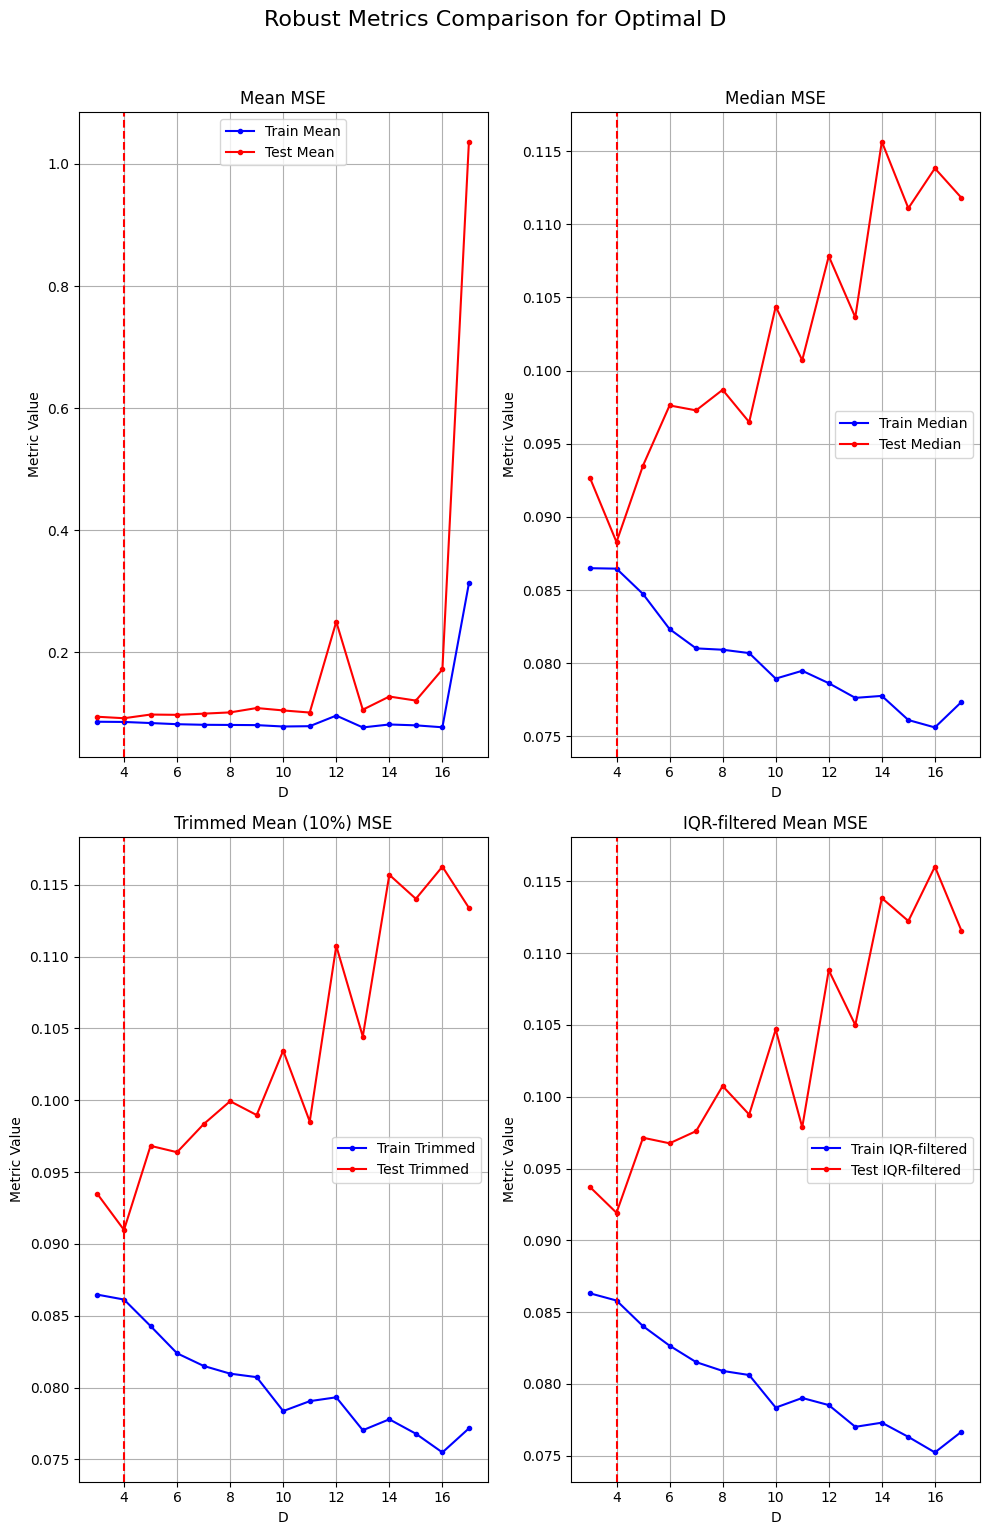

Optimal D for Each Method:
Train Mean: 13
Test Mean: 4
Train Median: 16
Test Median: 4
Train Trimmed Mean (10%): 16
Test Trimmed Mean (10%): 4
Train IQR-filtered Mean: 16
Test IQR-filtered Mean: 4


In [39]:
from scipy.stats import trim_mean
from sklearn.linear_model import HuberRegressor

def iqr_filtered_mean(errors):
    errors = np.array(errors)
    q1, q3 = np.percentile(errors, [25, 75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    filtered = errors[(errors >= lower) & (errors <= upper)]
    return np.mean(filtered) if len(filtered) > 0 else np.nan

# calculate metrics
metrics = {
    'Mean': lambda x: np.mean(x),
    'Median': lambda x: np.median(x),
    'Trimmed Mean (10%)': lambda x: trim_mean(x, 0.1),
    'IQR-filtered Mean': iqr_filtered_mean
}

train_metrics = {name: [] for name in metrics}
test_metrics = {name: [] for name in metrics}

for errors_train, errors_test in zip(current_train_errors_all, current_test_errors_all):
    for name, func in metrics.items():
        train_metrics[name].append(func(errors_train))
        test_metrics[name].append(func(errors_test))

# optimal D for each
optimal_Ds = {}
for name in metrics:
    optimal_Ds[f'Train {name}'] = Ds[np.nanargmin(train_metrics[name])]
    optimal_Ds[f'Test {name}'] = Ds[np.nanargmin(test_metrics[name])]

fig, axes = plt.subplots(2, 2, figsize=(10, 15))
plt.suptitle('Robust Metrics Comparison for Optimal D', y=1.02, fontsize=16)
axes[0, 0].plot(Ds, train_metrics['Mean'], '.-b', label='Train Mean')
axes[0, 0].plot(Ds, test_metrics['Mean'], '.-r', label='Test Mean')
axes[0, 0].axvline(optimal_Ds['Test Mean'], color='r', linestyle='--')
axes[0, 0].set_title('Mean MSE')
axes[0, 0].legend()
axes[0, 1].plot(Ds, train_metrics['Median'], '.-b', label='Train Median')
axes[0, 1].plot(Ds, test_metrics['Median'], '.-r', label='Test Median')
axes[0, 1].axvline(optimal_Ds['Test Median'], color='r', linestyle='--')
axes[0, 1].set_title('Median MSE')
axes[0, 1].legend()
axes[1, 0].plot(Ds, train_metrics['Trimmed Mean (10%)'], '.-b', label='Train Trimmed')
axes[1, 0].plot(Ds, test_metrics['Trimmed Mean (10%)'], '.-r', label='Test Trimmed')
axes[1, 0].axvline(optimal_Ds['Test Trimmed Mean (10%)'], color='r', linestyle='--')
axes[1, 0].set_title('Trimmed Mean (10%) MSE')
axes[1, 0].legend()
axes[1, 1].plot(Ds, train_metrics['IQR-filtered Mean'], '.-b', label='Train IQR-filtered')
axes[1, 1].plot(Ds, test_metrics['IQR-filtered Mean'], '.-r', label='Test IQR-filtered')
axes[1, 1].axvline(optimal_Ds['Test IQR-filtered Mean'], color='r', linestyle='--')
axes[1, 1].set_title('IQR-filtered Mean MSE')
axes[1, 1].legend()

for ax in axes.flat:
    ax.set_xlabel('D')
    ax.set_ylabel('Metric Value')
    ax.grid(True)
plt.tight_layout()
plt.show()

print("Optimal D for Each Method:")
for name, D in optimal_Ds.items():
    print(f"{name}: {D}")

Thus, random outliers account for less than 10% of the data and can be easily eliminated by calculating a 10% trimmed mean or by excluding the 1st quantile.

The training error indeed decreases almost monotonically as the number of parameters increases. However, the test error rises, and using more than four parameters leads to overfitting.

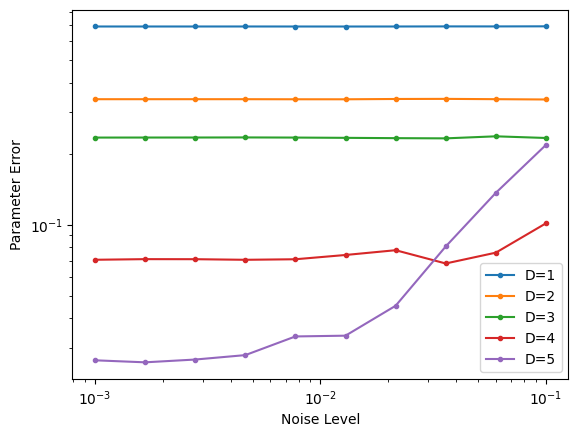

In [46]:
def noise_impact_with_shuffles(X, Y_clean, Ds=range(1,6), noise_levels=np.logspace(-3, -1, 10), n_shuffles=100):
    """
    Analyze noise impact with:
    - Ds: polynomial degrees (1-5)
    - noise_levels: 10 log-spaced points from 0.001 to 0.1
    - n_shuffles: number of random shuffles
    """
    param_errors = {D: [] for D in Ds}
    for noise in noise_levels:
        for D in Ds:
            errors = []
            for _ in range(n_shuffles):
                shuffle_idx = np.random.permutation(len(X))
                X_shuffled = X[shuffle_idx]
                Y_noisy = Y_clean[shuffle_idx] + np.random.randn(len(X)) * noise
                try:
                    f = F(X_shuffled, D)
                    theta = np.linalg.solve(f.T @ f, f.T @ Y_noisy)
                    true_coeffs = np.zeros(D) # compare to Taylor series
                    if D >= 1: true_coeffs[0] = 0
                    if D >= 2: true_coeffs[1] = 1
                    if D >= 4: true_coeffs[3] = -1/6
                    errors.append(np.mean(np.abs(theta - true_coeffs)))
                except np.linalg.LinAlgError:
                    errors.append(np.nan)
            param_errors[D].append(np.nanmedian(errors))
    plt.figure()
    for D in Ds:
        plt.loglog(noise_levels, param_errors[D], '.-', label=f'D={D}')
    plt.xlabel('Noise Level')
    plt.ylabel('Parameter Error')
    plt.legend()
    plt.show()

S = 100
X = np.random.rand(S) * 2
Y_clean = np.sin(X)

noise_impact_with_shuffles(X, Y_clean)

Increasing the number of parameters, noise impact grows more and more significantly.

---

In the examples above we used explicit results of differentiation but in practice gradient calculation performed by computer. For example, [``autograd``](https://github.com/HIPS/autograd) package is a tool to automatically differentiate native Python and Numpy code.

**Example 5** Create data array, define function and calculate its gradient using autograd

In [12]:
# import autograd as ag
# function that perform scalar product of vectors 'x' with 'n' multiplied by 't'
def f(x,t):
    n = np.arange(x.shape[0]) # create 'n' vector as array of numbers from 0 to length of 'x'
    return np.sum(x*n)*t

x = np.random.randn(10) # take input data as array of 10 random values
t = 15 # parameter
print('f(x,t) =',f(x,t) )
# ag.grad(f,y) - provides a partial derivative of 'f' function with respect 'y' variable
df = ag.grad(f,0) #define gradient
print('df/dx = ',df(x,t))

f(x,t) = -347.4956227964329
df/dx =  [  0.  15.  30.  45.  60.  75.  90. 105. 120. 135.]


**Note**: autograd works with non-integer arrays because you can not differentiate integer data.

There are some assumptions in previous consideration.

Firstly, in **least squares method** we assumed that we have a linear dependence from parameters but in the case of non-linear dependence we also need to use non-linear approximation.

**Problem 3.** Using [``autograd``](https://github.com/HIPS/autograd) package, try another non-linear approximation of $y(x)$,
e.g. by [rational function](https://en.wikipedia.org/wiki/Rational_function) (see also [Padé approximant](https://en.wikipedia.org/wiki/Pad%C3%A9_approximant)).

In [13]:
# Define the rational function: f(x) = (a0 + a1*x + a2*x^2) / (1 + b1*x + b2*x^2)
def rational_function(x, params):
    a0, a1, a2, b1, b2 = params
    numerator = a0 + a1 * x + a2 * x**2
    denominator = 1 + b1 * x + b2 * x**2
    return numerator / denominator

def loss_function(params, x, y):
    y_pred = rational_function(x, params)
    return np.mean((y - y_pred)**2)

grad_loss = ag.grad(loss_function)
params = np.array([1.0, 0.5, 0.2, 0.1, 0.01])

learning_rate = 0.1
num_iterations = 1000

for i in range(num_iterations):
    gradient = grad_loss(params, X, Y)
    params = params - learning_rate * gradient

    if (i+1) % 100 == 0: # output loss every 100 iters
        loss = loss_function(params, X, Y)
        print(f"Iteration {i}, Loss: {loss:.6f}")

Y_fitted = rational_function(X, params)

Iteration 99, Loss: 0.007741
Iteration 199, Loss: 0.004112
Iteration 299, Loss: 0.002438
Iteration 399, Loss: 0.001588
Iteration 499, Loss: 0.001133
Iteration 599, Loss: 0.000882
Iteration 699, Loss: 0.000740
Iteration 799, Loss: 0.000658
Iteration 899, Loss: 0.000610
Iteration 999, Loss: 0.000580


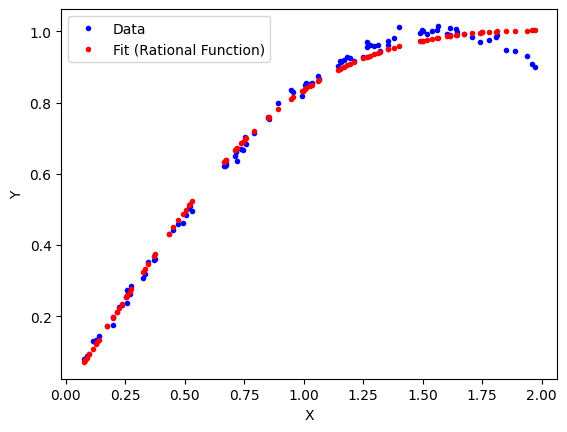

In [14]:
plt.plot(X, Y, '.b', label='Data')
plt.plot(X, Y_fitted, '.r', label='Fit (Rational Function)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

We achieved a wonderful result considering number of parameters involved (5). Generally, non-linear approximations require more parameters.

---

Secondly, we assumed that noise is a random value with normal probability distribution.
Let p and q be probability distributions of random values `x` and `y`. The cross-entropy of this distribution can be defined as
$H(p,q) = -\sum_{x\in X} p(x)\, \log q(x)$

**Problem 4.** Try to use [cross-entropy](https://en.wikipedia.org/wiki/Cross_entropy) as a loss function to evaluate distribution of the error term $W=Y-f(X)$.
Compare the result with the least squares method.
Train the method using noise with any not normal probability distribution.

For example:

a) [Student's t-distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution) for noise $W$: $f_W (x) = \dfrac{\Gamma\left(\dfrac{\nu+1}{2}\right)} {\sqrt{\nu\pi}\,\Gamma\left(\dfrac{\nu}{2}\right)} \left(1+\dfrac{x^2}\nu \right)^{-(\nu+1)/2}$

b) Uniform distribution for noise $ f_W = \dfrac{1}{b-a}$ for $a<x<b$

In [15]:
class StudentTDistribution:
    def __init__(self, df):
        self.df = df
        from math import gamma, pi, sqrt, log
        self.coeff = gamma((self.df + 1) / 2) / (sqrt(self.df * pi) * gamma(self.df / 2))
        self.log_coeff = log(self.coeff)

    def pdf(self, x):
        return self.coeff * (1 + x**2 / self.df) ** (-(self.df + 1) / 2)

    def logpdf(self, x):
        return self.log_coeff - ((self.df + 1) / 2) * np.log(1 + x**2 / self.df)

def cross_entropy_loss(params, x, y, noise_dist):
    y_pred = rational_function(x, params)
    w = y - y_pred
    return -np.mean(noise_dist.logpdf(w))

In [16]:
grad_cross_entropy = ag.grad(cross_entropy_loss)

params_t = np.array([1.0, 0.5, 0.2, 0.1, 0.01])
t_dist = StudentTDistribution(df=2.0)

learning_rate = 0.15
num_iterations = 1000

for i in range(num_iterations):
    gradient_t = grad_cross_entropy(params_t, X, Y, t_dist)
    params_t = params_t - learning_rate * gradient_t

    if (i+1) % 100 == 0:
        loss_t = cross_entropy_loss(params_t, X, Y, t_dist)
        print(f"Iteration {i}, Cross-Entropy-Loss (t-dist): {loss_t:.6f}")

Y_fitted_t = rational_function(X, params_t)

Iteration 99, Cross-Entropy-Loss (t-dist): 1.045459
Iteration 199, Cross-Entropy-Loss (t-dist): 1.042490
Iteration 299, Cross-Entropy-Loss (t-dist): 1.041258
Iteration 399, Cross-Entropy-Loss (t-dist): 1.040686
Iteration 499, Cross-Entropy-Loss (t-dist): 1.040406
Iteration 599, Cross-Entropy-Loss (t-dist): 1.040264
Iteration 699, Cross-Entropy-Loss (t-dist): 1.040189
Iteration 799, Cross-Entropy-Loss (t-dist): 1.040149
Iteration 899, Cross-Entropy-Loss (t-dist): 1.040126
Iteration 999, Cross-Entropy-Loss (t-dist): 1.040112


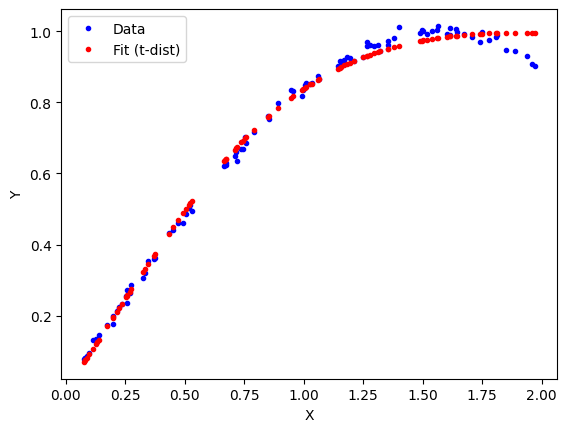

In [17]:
plt.plot(X, Y, '.b', label='Data')
plt.plot(X, Y_fitted_t, '.r', label='Fit (t-dist)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Training with df=1.0, lr=0.05
Iteration 99, Loss (t-dist): 1.158999
Iteration 199, Loss (t-dist): 1.153803
Iteration 299, Loss (t-dist): 1.150927
Iteration 399, Loss (t-dist): 1.149130
Iteration 499, Loss (t-dist): 1.147952
Iteration 599, Loss (t-dist): 1.147154
Iteration 699, Loss (t-dist): 1.146602
Iteration 799, Loss (t-dist): 1.146214
Iteration 899, Loss (t-dist): 1.145938
Iteration 999, Loss (t-dist): 1.145741


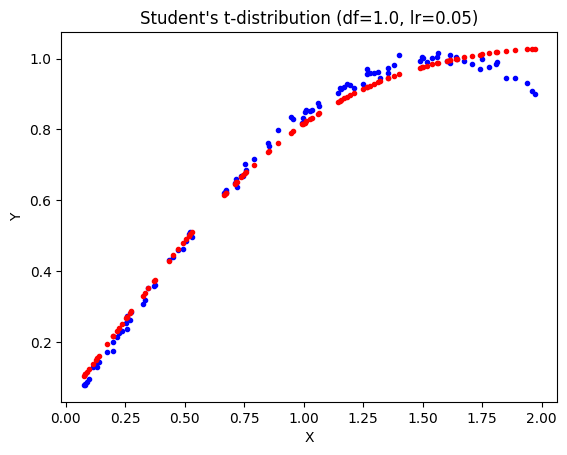

Training with df=1.0, lr=0.10
Iteration 99, Loss (t-dist): 1.153646
Iteration 199, Loss (t-dist): 1.149142
Iteration 299, Loss (t-dist): 1.147199
Iteration 399, Loss (t-dist): 1.146260
Iteration 499, Loss (t-dist): 1.145781
Iteration 599, Loss (t-dist): 1.145527
Iteration 699, Loss (t-dist): 1.145390
Iteration 799, Loss (t-dist): 1.145313
Iteration 899, Loss (t-dist): 1.145270
Iteration 999, Loss (t-dist): 1.145243


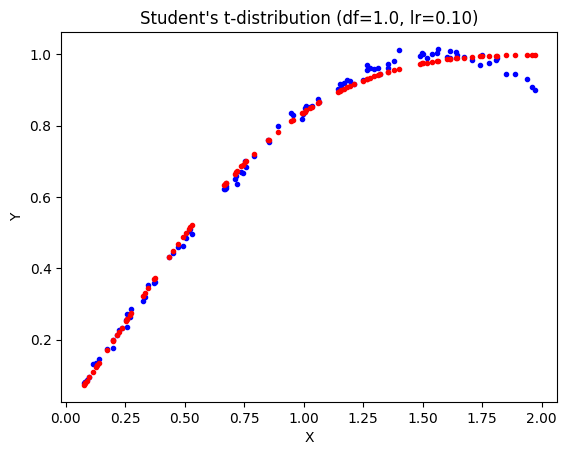

Training with df=1.0, lr=0.20
Iteration 99, Loss (t-dist): 1.149106
Iteration 199, Loss (t-dist): 1.146425
Iteration 299, Loss (t-dist): 1.145662
Iteration 399, Loss (t-dist): 1.145416
Iteration 499, Loss (t-dist): 1.145329
Iteration 599, Loss (t-dist): 1.145293
Iteration 699, Loss (t-dist): 1.145274
Iteration 799, Loss (t-dist): 1.145261
Iteration 899, Loss (t-dist): 1.145249
Iteration 999, Loss (t-dist): 1.145238


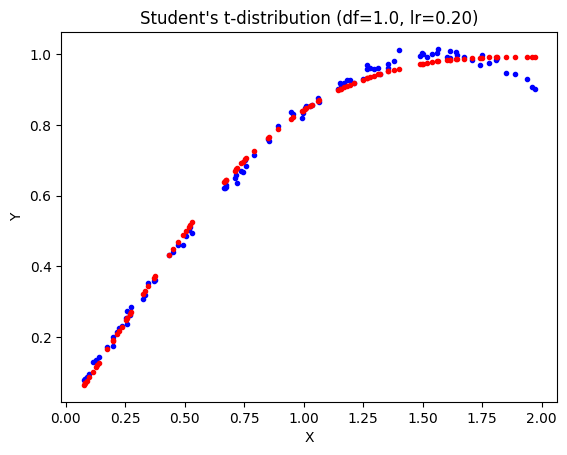

Training with df=1.0, lr=0.50
Iteration 99, Loss (t-dist): 1.146347
Iteration 199, Loss (t-dist): 1.145736
Iteration 299, Loss (t-dist): 1.145623
Iteration 399, Loss (t-dist): 1.145586
Iteration 499, Loss (t-dist): 1.145562
Iteration 599, Loss (t-dist): 1.145539
Iteration 699, Loss (t-dist): 1.145517
Iteration 799, Loss (t-dist): 1.145495
Iteration 899, Loss (t-dist): 1.145473
Iteration 999, Loss (t-dist): 1.145452


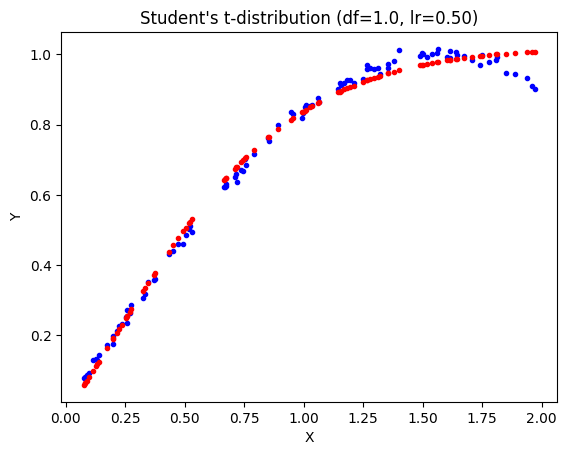

Training with df=1.0, lr=1.00
Iteration 99, Loss (t-dist): 1.146148
Iteration 199, Loss (t-dist): 1.146101
Iteration 299, Loss (t-dist): 1.146067
Iteration 399, Loss (t-dist): 1.146035
Iteration 499, Loss (t-dist): 1.146004
Iteration 599, Loss (t-dist): 1.145974
Iteration 699, Loss (t-dist): 1.145944
Iteration 799, Loss (t-dist): 1.145914
Iteration 899, Loss (t-dist): 1.145884
Iteration 999, Loss (t-dist): 1.145855


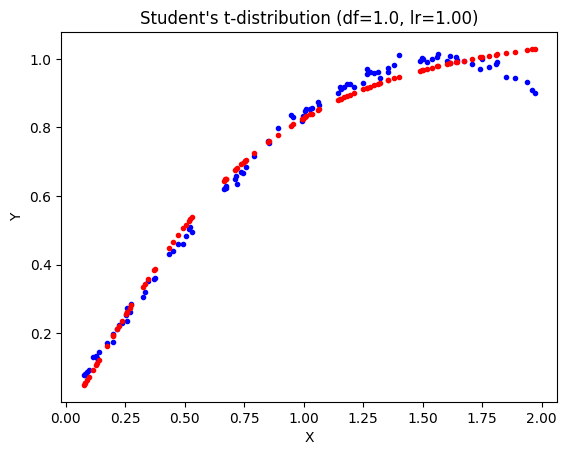

Training with df=1.0, lr=5.00
Iteration 99, Loss (t-dist): 1.155102
Iteration 199, Loss (t-dist): 1.150565
Iteration 299, Loss (t-dist): 1.148678
Iteration 399, Loss (t-dist): 1.147896
Iteration 499, Loss (t-dist): 1.147571
Iteration 599, Loss (t-dist): 1.147429
Iteration 699, Loss (t-dist): 1.147357
Iteration 799, Loss (t-dist): 1.147311
Iteration 899, Loss (t-dist): 1.147275
Iteration 999, Loss (t-dist): 1.147242


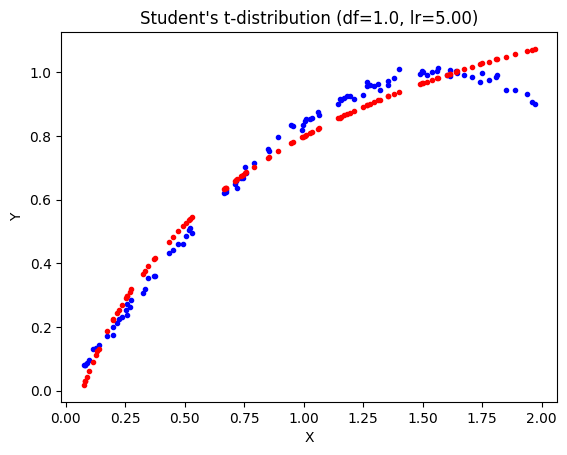

Training with df=2.0, lr=0.05
Iteration 99, Loss (t-dist): 1.052080
Iteration 199, Loss (t-dist): 1.047905
Iteration 299, Loss (t-dist): 1.045714
Iteration 399, Loss (t-dist): 1.044239
Iteration 499, Loss (t-dist): 1.043203
Iteration 599, Loss (t-dist): 1.042454
Iteration 699, Loss (t-dist): 1.041902
Iteration 799, Loss (t-dist): 1.041488
Iteration 899, Loss (t-dist): 1.041174
Iteration 999, Loss (t-dist): 1.040934


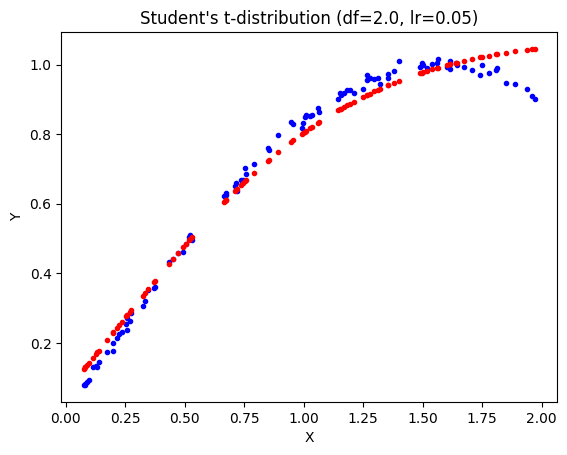

Training with df=2.0, lr=0.10
Iteration 99, Loss (t-dist): 1.047707
Iteration 199, Loss (t-dist): 1.044207
Iteration 299, Loss (t-dist): 1.042472
Iteration 399, Loss (t-dist): 1.041519
Iteration 499, Loss (t-dist): 1.040967
Iteration 599, Loss (t-dist): 1.040636
Iteration 699, Loss (t-dist): 1.040434
Iteration 799, Loss (t-dist): 1.040307
Iteration 899, Loss (t-dist): 1.040228
Iteration 999, Loss (t-dist): 1.040177


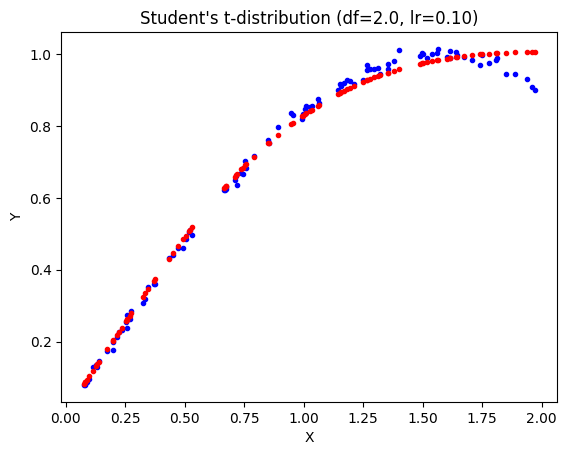

Training with df=2.0, lr=0.20
Iteration 99, Loss (t-dist): 1.044023
Iteration 199, Loss (t-dist): 1.041615
Iteration 299, Loss (t-dist): 1.040749
Iteration 399, Loss (t-dist): 1.040401
Iteration 499, Loss (t-dist): 1.040253
Iteration 599, Loss (t-dist): 1.040187
Iteration 699, Loss (t-dist): 1.040155
Iteration 799, Loss (t-dist): 1.040137
Iteration 899, Loss (t-dist): 1.040127
Iteration 999, Loss (t-dist): 1.040118


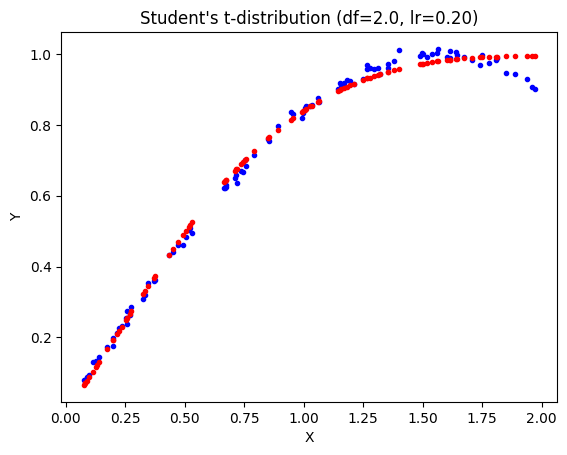

Training with df=2.0, lr=0.50
Iteration 99, Loss (t-dist): 1.041236
Iteration 199, Loss (t-dist): 1.040583
Iteration 299, Loss (t-dist): 1.040423
Iteration 399, Loss (t-dist): 1.040374
Iteration 499, Loss (t-dist): 1.040353
Iteration 599, Loss (t-dist): 1.040338
Iteration 699, Loss (t-dist): 1.040325
Iteration 799, Loss (t-dist): 1.040312
Iteration 899, Loss (t-dist): 1.040299
Iteration 999, Loss (t-dist): 1.040287


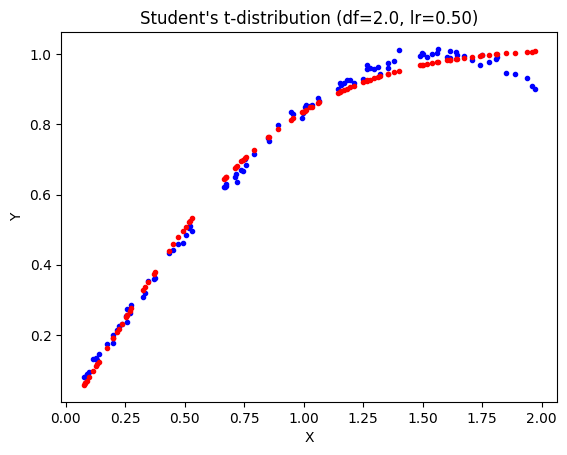

Training with df=2.0, lr=1.00
Iteration 99, Loss (t-dist): 1.040783
Iteration 199, Loss (t-dist): 1.040742
Iteration 299, Loss (t-dist): 1.040719
Iteration 399, Loss (t-dist): 1.040700
Iteration 499, Loss (t-dist): 1.040682
Iteration 599, Loss (t-dist): 1.040664
Iteration 699, Loss (t-dist): 1.040647
Iteration 799, Loss (t-dist): 1.040629
Iteration 899, Loss (t-dist): 1.040612
Iteration 999, Loss (t-dist): 1.040595


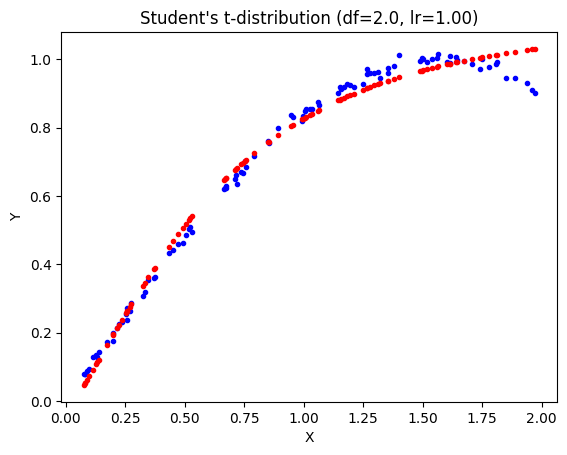

Training with df=2.0, lr=5.00
Iteration 99, Loss (t-dist): 1.048144
Iteration 199, Loss (t-dist): 1.044752
Iteration 299, Loss (t-dist): 1.043191
Iteration 399, Loss (t-dist): 1.042414
Iteration 499, Loss (t-dist): 1.042029
Iteration 599, Loss (t-dist): 1.041838
Iteration 699, Loss (t-dist): 1.041739
Iteration 799, Loss (t-dist): 1.041684
Iteration 899, Loss (t-dist): 1.041650
Iteration 999, Loss (t-dist): 1.041624


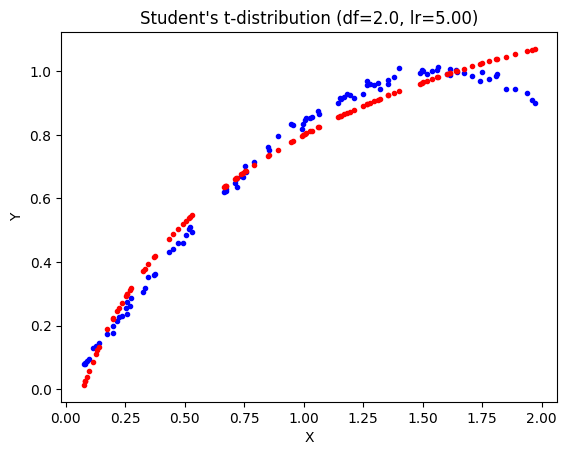

Training with df=5.0, lr=0.05
Iteration 99, Loss (t-dist): 0.979994
Iteration 199, Loss (t-dist): 0.976005
Iteration 299, Loss (t-dist): 0.974276
Iteration 399, Loss (t-dist): 0.973061
Iteration 499, Loss (t-dist): 0.972168
Iteration 599, Loss (t-dist): 0.971496
Iteration 699, Loss (t-dist): 0.970979
Iteration 799, Loss (t-dist): 0.970577
Iteration 899, Loss (t-dist): 0.970260
Iteration 999, Loss (t-dist): 0.970008


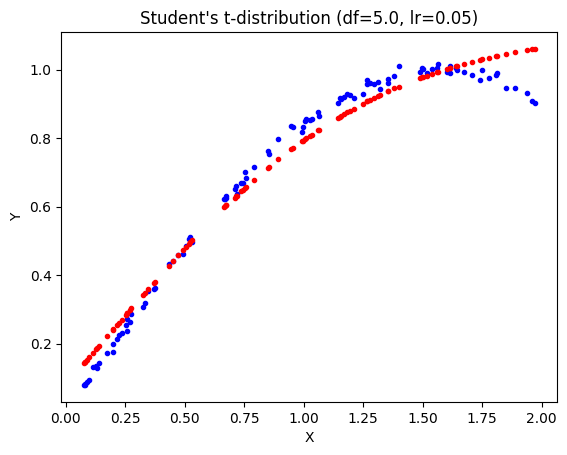

Training with df=5.0, lr=0.10
Iteration 99, Loss (t-dist): 0.975792
Iteration 199, Loss (t-dist): 0.973000
Iteration 299, Loss (t-dist): 0.971490
Iteration 399, Loss (t-dist): 0.970593
Iteration 499, Loss (t-dist): 0.970031
Iteration 599, Loss (t-dist): 0.969668
Iteration 699, Loss (t-dist): 0.969429
Iteration 799, Loss (t-dist): 0.969268
Iteration 899, Loss (t-dist): 0.969158
Iteration 999, Loss (t-dist): 0.969083


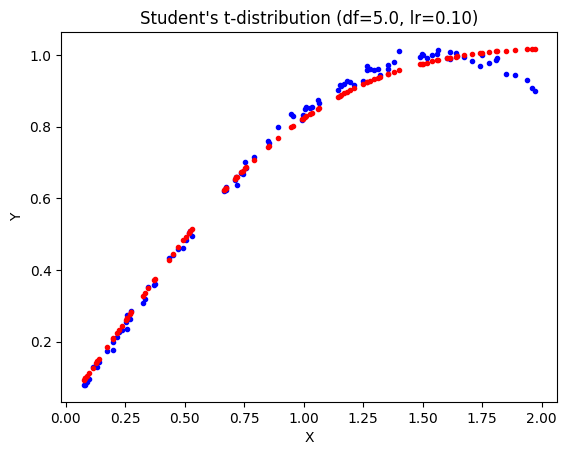

Training with df=5.0, lr=0.20
Iteration 99, Loss (t-dist): 0.972726
Iteration 199, Loss (t-dist): 0.970628
Iteration 299, Loss (t-dist): 0.969755
Iteration 399, Loss (t-dist): 0.969351
Iteration 499, Loss (t-dist): 0.969155
Iteration 599, Loss (t-dist): 0.969056
Iteration 699, Loss (t-dist): 0.969004
Iteration 799, Loss (t-dist): 0.968976
Iteration 899, Loss (t-dist): 0.968960
Iteration 999, Loss (t-dist): 0.968950


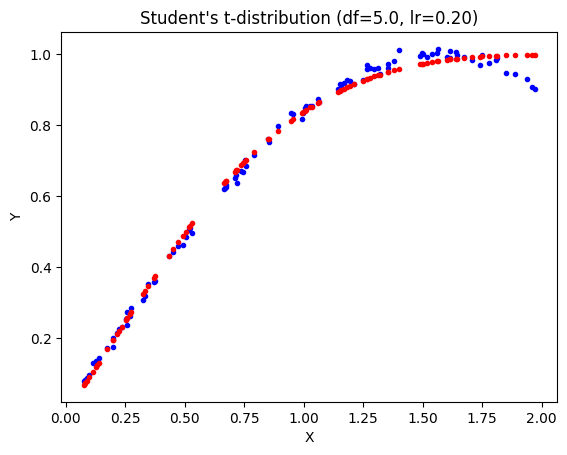

Training with df=5.0, lr=0.50
Iteration 99, Loss (t-dist): 0.970052
Iteration 199, Loss (t-dist): 0.969418
Iteration 299, Loss (t-dist): 0.969225
Iteration 399, Loss (t-dist): 0.969160
Iteration 499, Loss (t-dist): 0.969133
Iteration 599, Loss (t-dist): 0.969119
Iteration 699, Loss (t-dist): 0.969109
Iteration 799, Loss (t-dist): 0.969100
Iteration 899, Loss (t-dist): 0.969092
Iteration 999, Loss (t-dist): 0.969084


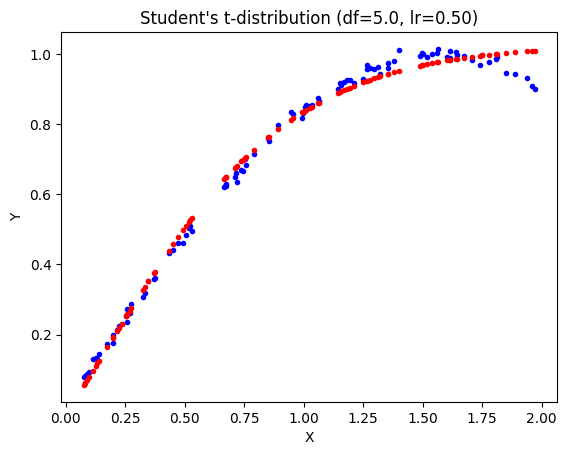

Training with df=5.0, lr=1.00
Iteration 99, Loss (t-dist): 0.969471
Iteration 199, Loss (t-dist): 0.969435
Iteration 299, Loss (t-dist): 0.969416
Iteration 399, Loss (t-dist): 0.969402
Iteration 499, Loss (t-dist): 0.969390
Iteration 599, Loss (t-dist): 0.969378
Iteration 699, Loss (t-dist): 0.969367
Iteration 799, Loss (t-dist): 0.969355
Iteration 899, Loss (t-dist): 0.969344
Iteration 999, Loss (t-dist): 0.969333


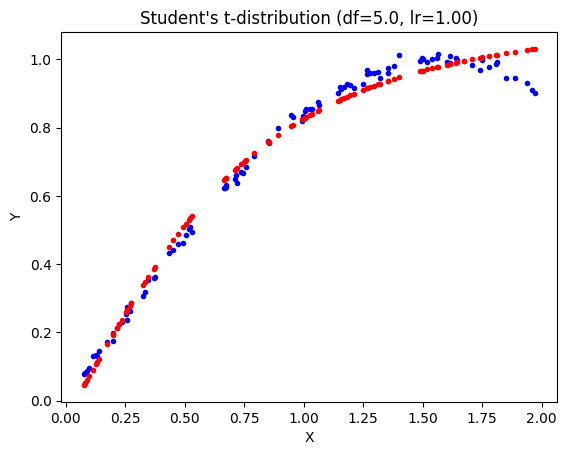

Training with df=5.0, lr=5.00
Iteration 99, Loss (t-dist): 0.976259
Iteration 199, Loss (t-dist): 0.973102
Iteration 299, Loss (t-dist): 0.971798
Iteration 399, Loss (t-dist): 0.971066
Iteration 499, Loss (t-dist): 0.970658
Iteration 599, Loss (t-dist): 0.970430
Iteration 699, Loss (t-dist): 0.970303
Iteration 799, Loss (t-dist): 0.970230
Iteration 899, Loss (t-dist): 0.970186
Iteration 999, Loss (t-dist): 0.970158


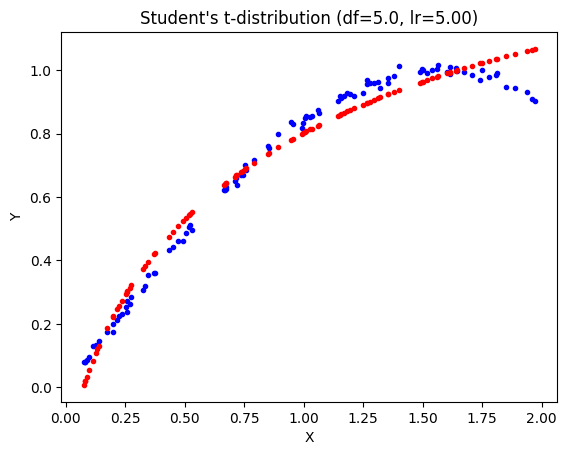

Training with df=10.0, lr=0.05
Iteration 99, Loss (t-dist): 0.955017
Iteration 199, Loss (t-dist): 0.950964
Iteration 299, Loss (t-dist): 0.949391
Iteration 399, Loss (t-dist): 0.948274
Iteration 499, Loss (t-dist): 0.947440
Iteration 599, Loss (t-dist): 0.946802
Iteration 699, Loss (t-dist): 0.946306
Iteration 799, Loss (t-dist): 0.945914
Iteration 899, Loss (t-dist): 0.945601
Iteration 999, Loss (t-dist): 0.945349


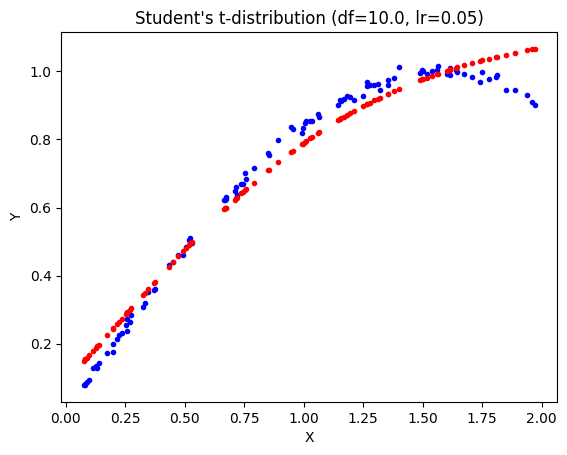

Training with df=10.0, lr=0.10
Iteration 99, Loss (t-dist): 0.950748
Iteration 199, Loss (t-dist): 0.948202
Iteration 299, Loss (t-dist): 0.946788
Iteration 399, Loss (t-dist): 0.945924
Iteration 499, Loss (t-dist): 0.945369
Iteration 599, Loss (t-dist): 0.945001
Iteration 699, Loss (t-dist): 0.944751
Iteration 799, Loss (t-dist): 0.944579
Iteration 899, Loss (t-dist): 0.944460
Iteration 999, Loss (t-dist): 0.944375


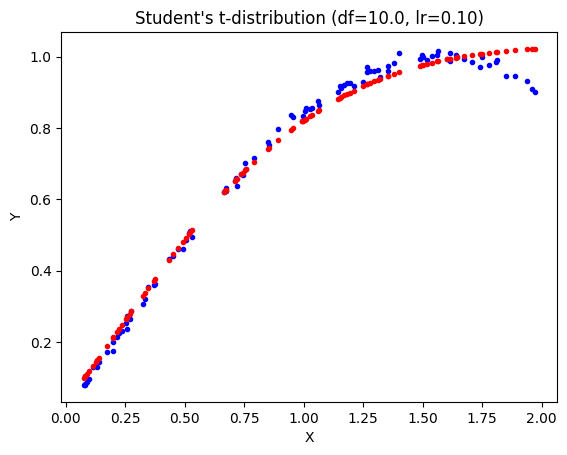

Training with df=10.0, lr=0.20
Iteration 99, Loss (t-dist): 0.947899
Iteration 199, Loss (t-dist): 0.945934
Iteration 299, Loss (t-dist): 0.945074
Iteration 399, Loss (t-dist): 0.944657
Iteration 499, Loss (t-dist): 0.944445
Iteration 599, Loss (t-dist): 0.944333
Iteration 699, Loss (t-dist): 0.944272
Iteration 799, Loss (t-dist): 0.944238
Iteration 899, Loss (t-dist): 0.944219
Iteration 999, Loss (t-dist): 0.944206


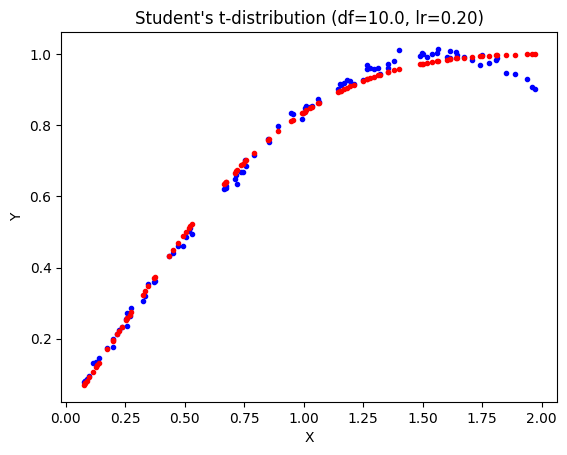

Training with df=10.0, lr=0.50
Iteration 99, Loss (t-dist): 0.945293
Iteration 199, Loss (t-dist): 0.944678
Iteration 299, Loss (t-dist): 0.944476
Iteration 399, Loss (t-dist): 0.944403
Iteration 499, Loss (t-dist): 0.944373
Iteration 599, Loss (t-dist): 0.944358
Iteration 699, Loss (t-dist): 0.944349
Iteration 799, Loss (t-dist): 0.944341
Iteration 899, Loss (t-dist): 0.944334
Iteration 999, Loss (t-dist): 0.944327


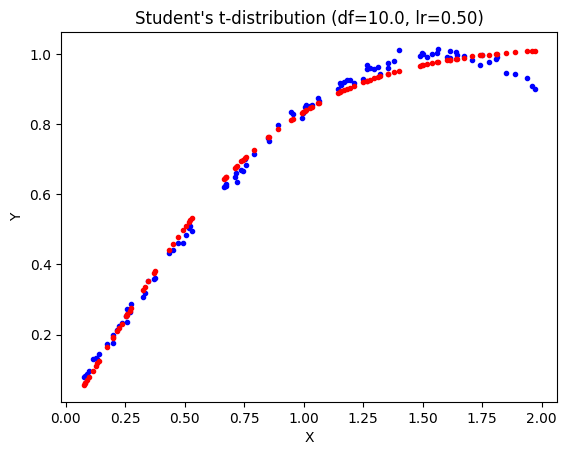

Training with df=10.0, lr=1.00
Iteration 99, Loss (t-dist): 0.944678
Iteration 199, Loss (t-dist): 0.944644
Iteration 299, Loss (t-dist): 0.944627
Iteration 399, Loss (t-dist): 0.944615
Iteration 499, Loss (t-dist): 0.944604
Iteration 599, Loss (t-dist): 0.944594
Iteration 699, Loss (t-dist): 0.944584
Iteration 799, Loss (t-dist): 0.944575
Iteration 899, Loss (t-dist): 0.944565
Iteration 999, Loss (t-dist): 0.944556


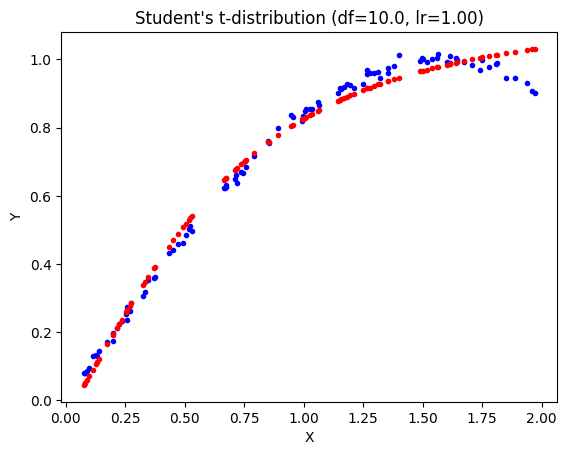

Training with df=10.0, lr=5.00
Iteration 99, Loss (t-dist): 0.951495
Iteration 199, Loss (t-dist): 0.948192
Iteration 299, Loss (t-dist): 0.946981
Iteration 399, Loss (t-dist): 0.946272
Iteration 499, Loss (t-dist): 0.945860
Iteration 599, Loss (t-dist): 0.945620
Iteration 699, Loss (t-dist): 0.945481
Iteration 799, Loss (t-dist): 0.945399
Iteration 899, Loss (t-dist): 0.945349
Iteration 999, Loss (t-dist): 0.945317


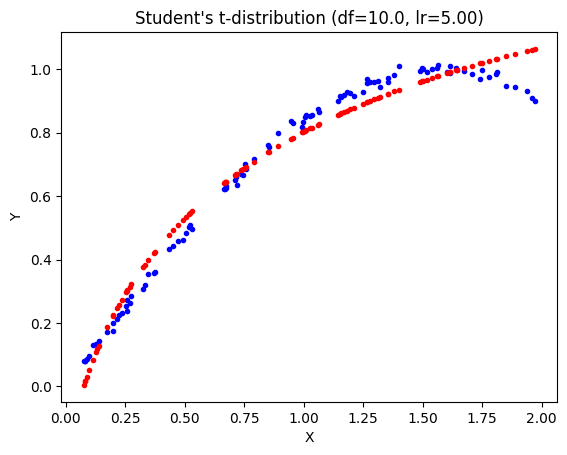

In [18]:
df_values = [1.0, 2.0, 5.0, 10.0]
lr_values = [0.05,0.1,0.2,0.5,1,5]

for df in df_values:
    t_dist = StudentTDistribution(df=df)

    for lr in lr_values:
        print(f"Training with df={df}, lr={lr:.2f}")

        params_t = np.array([1.0, 0.5, 0.2, 0.1, 0.01])

        for i in range(num_iterations):
            gradient_t = grad_cross_entropy(params_t, X, Y, t_dist)
            params_t = params_t - lr * gradient_t

            if (i+1) % 100 == 0:
                loss_t = cross_entropy_loss(params_t, X, Y, t_dist)
                print(f"Iteration {i}, Loss (t-dist): {loss_t:.6f}")

        Y_fitted_t = rational_function(X, params_t)

        plt.figure()
        plt.plot(X, Y, '.b')
        plt.plot(X, Y_fitted_t, '.r')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(f'Student\'s t-distribution (df={df}, lr={lr:.2f})')
        plt.show()

**Quick recap**
1) Define model
2) Separate data on training and testing parts
3) Calculate gradient (for example, using autograd)
4) Optimize
5) Check overfitting (for example cross-validation)

**Example 6** Find optimal value of parameter $\theta$ where minimum of Loss function $R(x,y,\theta)$ is achieved using autograd.

Here we will use loss function from **Example 3** defined as a mean square error.
We start from definition of a gradient and then introduce optimization function

In [19]:
dR = ag.grad(fun=R, argnum=0)
# print( R(theta_optimal, X, Y) )
print( dR(theta_optimal, X, Y) )
print( dR(theta_lsq, X, Y) )

ValueError: operands could not be broadcast together with shapes (100,) (6,) 

In [ ]:
theta0 = theta_optimal

def optimize(x,y, theta, alpha, tol=1e-6, maxiter=10000):
  for it in range(maxiter):
    loss = R(theta=theta, x=x, y=y)
    dloss = dR(theta, x, y)
    norm_dloss = np.linalg.norm(dloss.flatten())
    if it%100 == 0:
      print(f"{it}: {loss} {norm_dloss}")
    if norm_dloss<tol: return theta
    theta = theta - alpha*dloss
  return theta

In [ ]:
theta0 = optimize(x=X, y=Y, theta=theta0, alpha=5e-5)
print(theta0)